In [31]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset 
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report
from surprise import BaselineOnly
from surprise import NMF
from surprise import SVD

In [33]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\Java\\Diplomski- movies\\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Java\Diplomski- movies\data\credits.csv
C:\Users\Java\Diplomski- movies\data\keywords.csv
C:\Users\Java\Diplomski- movies\data\links.csv
C:\Users\Java\Diplomski- movies\data\links_small.csv
C:\Users\Java\Diplomski- movies\data\movies_metadata.csv
C:\Users\Java\Diplomski- movies\data\ratings.csv
C:\Users\Java\Diplomski- movies\data\ratings_small.csv


In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [35]:
pd.options.display.max_columns=None
#pd.set_option('display.max_colwidth', None)

In [36]:
import warnings; warnings.simplefilter('ignore')

# Attempt 1

# The Simple Recommender -IMDB formula 

Offers generalized recommnendations to every user based on movie popularity and (sometimes) genre.
The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience. 
This model does not give personalized recommendations based on the user.

All we have to do is sort our movies based on ratings and popularity and display the top movies of our list. As an added step, we can pass in a genre argument to get the top movies of a particular genre.



In [37]:
meta = pd. read_csv('data/movies_metadata.csv')
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Number of nulll values:

In [38]:
meta.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Preparing and cleaning the dataset:

In [39]:
meta['genres'] = meta['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['production_companies']= meta['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['production_countries'] = meta['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['spoken_languages'] = meta['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


Take the year out of date:

In [40]:
meta['year'] = pd.to_datetime(meta['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [41]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995


In [42]:
meta.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         0
production_countries         0
release_date                87
revenue                      6
runtime                    263
spoken_languages             0
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
year                         0
dtype: int64

Bolje srediti set

# Logic

We will use weighted rating formula to construct the chart.

 Weighted Rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
 
 R-avg rating for the movie
 V- number of  votes fot the movie
 m- minimum votes required to be in the top
 C- is the mean vote across the whole report
 

In [43]:
vote_counts = meta[meta['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = meta[meta['vote_average'].notnull()]['vote_average'].astype('int')

We need to choose a good value for m which represents the minimum votes to be listed in the chart.
For a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

In [44]:
C = vote_averages.mean()
print('The Mean value of the voting averages= ',C)
m = vote_counts.quantile(0.95)
print('The minimum vote count for a movie to consider= ',m)

The Mean value of the voting averages=  5.244896612406511
The minimum vote count for a movie to consider=  434.0


In [45]:
qualified = meta[(meta['vote_count'] >= m) & (meta['vote_count'].notnull()) & (meta['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')

print('The structure of the qualified database is= ', qualified.shape)

The structure of the qualified database is=  (2274, 6)


In [46]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [47]:
qualified['weighted rating'] = qualified.apply(weighted_rating, axis=1)
qualified = qualified.sort_values('weighted rating', ascending=False).head(200)

In [48]:
qualified.head(20)

,title,year,vote_count,vote_average,popularity,genres,weighted rating
15480,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.869599,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.950236,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.645403,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.307194,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,"[Adventure, Fantasy, Action]",7.851924


The chart indicates a strong bias of users towards particular genres and directors.

Text(0.5, 1.0, 'Top 20 Movies')

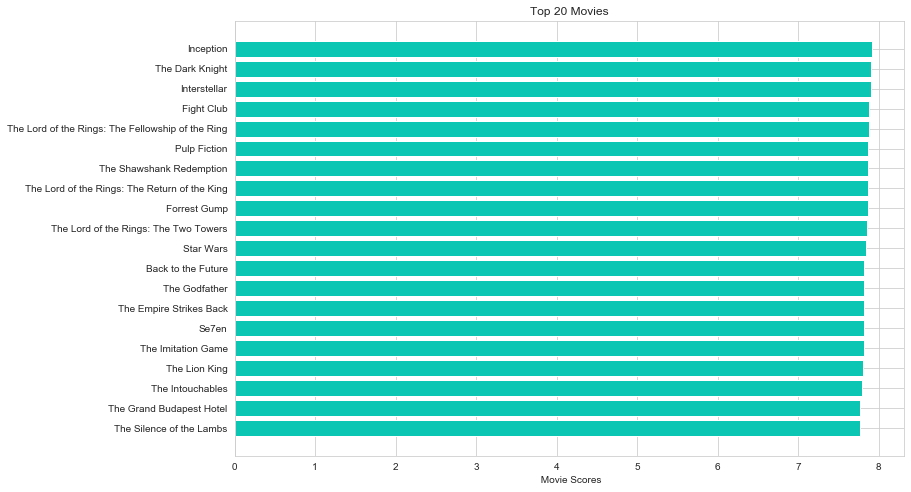

In [49]:
toptwenty_scores=qualified['weighted rating'].head(20) 
toptwenty_titles=qualified['title'].head(20) 

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.barh(toptwenty_titles,toptwenty_scores, align='center',color='#0ac6b3')
plt.gca().invert_yaxis()
plt.xlabel(" Movie Scores")
plt.title("Top 20 Movies")

Making a chart for a particular genre:

In [50]:
s = meta.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
genres_md = meta.drop('genres', axis=1).join(s)
genres_md.head(10)

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,1995,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,1995,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,1995,Family
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Adventure
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Fantasy
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Family
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,Romance
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,Comedy
3,False,NaN,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,Comedy
3,False,NaN,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,Drama


Number of movies per genre:

In [80]:
number_gen = pd.DataFrame(genres_md['genre'].value_counts()).reset_index()
number_gen.columns = ['genre', 'movies']
number_gen.head(5)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596


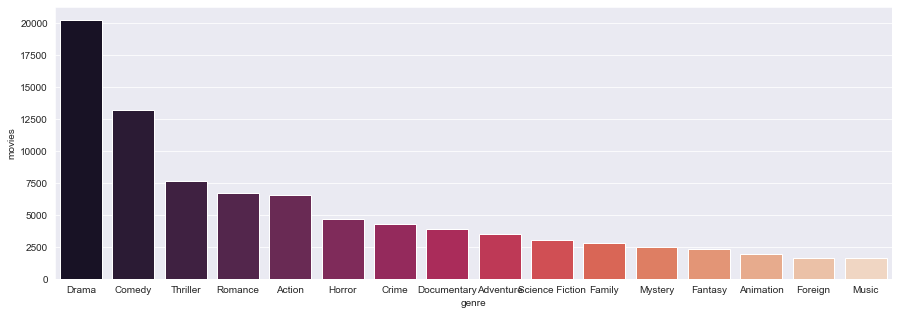

In [79]:
plt.figure(figsize=(15,5))
sns.barplot(x='genre', y='movies', data=number_gen.head(16), palette="rocket")
plt.show()

In [51]:
def make_a_chart(genre, percentile=0.85):
    df = genres_md[genres_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'vote_count', 'vote_average', 'popularity', 'year']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['weighted rating'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('weighted rating', ascending=False).head(200)
    
    return qualified

In [52]:
make_a_chart('Fantasy').head(10)

,title,vote_count,vote_average,popularity,year,weighted rating
4863,The Lord of the Rings: The Fellowship of the Ring,8892,8,32.070725,2001,7.888126
7000,The Lord of the Rings: The Return of the King,8226,8,29.324358,2003,7.879484
5814,The Lord of the Rings: The Two Towers,7641,8,29.423537,2002,7.870711
3030,The Green Mile,4166,8,19.96678,1999,7.772216
5481,Spirited Away,3968,8,41.048867,2001,7.761880
9698,Howl's Moving Castle,2049,8,16.136048,2004,7.574941
2884,Princess Mononoke,2041,8,17.166725,1997,7.573545
5833,My Neighbor Totoro,1730,8,13.507299,1988,7.511144
926,It's a Wonderful Life,1103,8,15.031588,1946,7.306584
14551,Avatar,12114,7,185.070892,2009,6.948550


Text(0.5, 1.0, 'Top 10 in Fantasy')

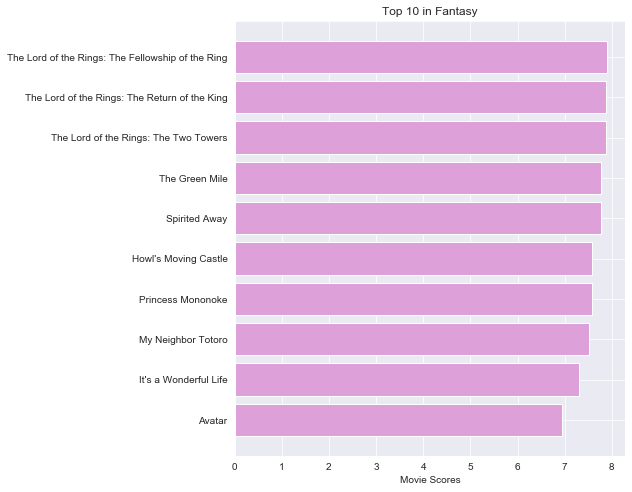

In [58]:
qualifiedGenre=make_a_chart('Fantasy')
top_ten_fantasy_scores=qualifiedGenre['weighted rating'].head(10) 
top_ten_titles=qualifiedGenre['title'].head(10) 

sns.set_style('darkgrid')
plt.figure(figsize=(7,8))
plt.barh(top_ten_titles,top_ten_fantasy_scores, align='center',color='#dea0d8')
plt.gca().invert_yaxis()
plt.xlabel("Movie Scores")
plt.title("Top 10 in Fantasy")

# Content Based filtering

Movie Overviews and Taglines

In [81]:
links_small = pd.read_csv('data/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [82]:
links_small.head(10)

0      862
1     8844
2    15602
3    31357
4    11862
5      949
6    11860
7    45325
8     9091
9      710
Name: tmdbId, dtype: int32

In [83]:
meta = meta.drop([19730, 29503, 35587])

In [84]:
meta['id'] = meta['id'].astype('int')

In [85]:
smd = meta[meta['id'].isin(links_small)]
smd.shape

(9099, 25)

In [86]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

In [87]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [88]:
tfidf_matrix.shape

(9099, 268124)

Cosine Similarity

In [89]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

In [90]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [91]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [92]:
get_recommendations('Inception').head(20)

5239                                Cypher
141                                  Crumb
6398                           Renaissance
653                              Lone Star
1703                                 House
4739                      The Pink Panther
319                                   Cobb
2828      What Ever Happened to Baby Jane?
8867                       Pitch Perfect 2
979            Once Upon a Time in America
8568    Mission: Impossible - Rogue Nation
3657                          Tango & Cash
8291                                 Syrup
2964                               Burglar
7646                   The Next Three Days
6044           The Seven-Per-Cent Solution
6564                           Harsh Times
202                      Dolores Claiborne
561                    Mission: Impossible
6224                 A History of Violence
Name: title, dtype: object

# Collaborative Filtering

In [93]:
reader = Reader()
ratings = pd.read_csv('data/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [94]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'],cv=10)

{'test_rmse': array([0.89544345, 0.89172938, 0.87852242, 0.88908896, 0.8902605 ,
        0.89138216, 0.89091068, 0.8948688 , 0.8961145 , 0.89785267]),
 'test_mae': array([0.68892241, 0.68826582, 0.67409738, 0.6838507 , 0.68248504,
        0.688057  , 0.6863547 , 0.68822359, 0.68901839, 0.69270168]),
 'fit_time': (7.607723712921143,
  7.607373476028442,
  7.564030170440674,
  7.672330379486084,
  7.570290565490723,
  7.683884859085083,
  7.614594221115112,
  7.717649698257446,
  7.652524471282959,
  7.913928508758545),
 'test_time': (0.09711813926696777,
  0.09002971649169922,
  0.08998942375183105,
  0.09194803237915039,
  0.09098172187805176,
  0.09694194793701172,
  0.0909888744354248,
  0.09211874008178711,
  0.09412670135498047,
  0.0939948558807373)}

In [95]:
train_dataset = data.build_full_trainset()
svd.fit(train_dataset)

In [96]:
user_ratings=pd.merge(ratings,meta,left_on='movieId',right_on='id',how='inner')
user_ratings_final=user_ratings[['userId', 'movieId', 'rating','original_title']]
user_ratings=user_ratings_final.sort_values(by='userId')
user_ratings.head()

,userId,movieId,rating,original_title
0,1,1371,2.5,Rocky III
182,1,2294,2.0,Jay and Silent Bob Strike Back
235,1,2455,2.5,Vivement dimanche!
47,1,1405,1.0,Greed
140,1,2193,2.0,My Tutor


In [97]:
user_ratings[user_ratings['userId'] == 178]

,userId,movieId,rating,original_title
6770,178,595,3.5,To Kill a Mockingbird
40502,178,74948,4.0,Steppenwolf
7169,178,1580,4.0,Rope
11731,178,1387,3.5,Superstar: The Karen Carpenter Story
32237,178,46578,3.0,The Great American Girl Robbery
25315,178,899,3.0,Broken Blossoms
35852,178,1873,2.5,Beyond Rangoon
20126,178,4034,2.5,L'Homme de Rio
10925,178,1259,5.0,Notes on a Scandal
26335,178,1262,5.0,Stranger Than Fiction


In [98]:
movieExample=meta['original_title']=='Inception'
meta[movieExample][['original_title','id']]

,original_title,id
15480,Inception,27205


In [99]:
svd.predict(178, 27205, 3)

Prediction(uid=178, iid=27205, r_ui=3, est=3.1136504109935474, details={'was_impossible': False})



# ATTEMPT 2


Loading data and exploring it

In [100]:
df = pd.read_csv("data/ratings_small.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [101]:
df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [103]:
d_true = df.duplicated(['userId','movieId','rating'])
print("Number of duplicated records:",sum(d_true))

Number of duplicated records: 0


In [104]:
print("Number of users:", df["userId"].nunique())
print("Number of movies:", df["movieId"].nunique())
print("Total no of ratings :",df.shape[0])

Number of users: 671
Number of movies: 9066
Total no of ratings : 100004


Ratings per movie

In [105]:
ratings_pm = df.groupby(by='movieId')['rating'].count()
ratings_pm.describe()

count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
Name: rating, dtype: float64

Ratings per person

In [106]:
ratings_pu = df.groupby(by='userId')['rating'].count()#.sort_values(ascending=False)
ratings_pu.describe()

count     671.000000
mean      149.037258
std       231.226948
min        20.000000
25%        37.000000
50%        71.000000
75%       161.000000
max      2391.000000
Name: rating, dtype: float64

In [107]:
reader = Reader()
ratings = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

Making the train and test datasets

In [108]:
train_ratings, test_ratings = train_test_split(ratings, test_size=.20, random_state = 78)

In [109]:
print("Test: ", len(test_ratings))
print("Trainset: ", train_ratings.n_ratings)

Test:  20001
Trainset:  80003


# Models for recommendation

# 1. BASEMODEL - fitting, evaluation, ( + recommendation -dodati)

In [114]:
baseline_model = BaselineOnly(verbose = False)
baseline_model.fit(train_ratings)


In [115]:
train_predictions = baseline_model.test(train_ratings.build_testset())
test_predictions = baseline_model.test(test_ratings)

In [116]:
print("RMSE on test: ", accuracy.rmse(test_predictions,verbose = False))
print("RMSE on train : ", accuracy.rmse(train_predictions,verbose = False))

RMSE on test:  0.8983008814845294
RMSE on train :  0.8552495078978606


# 2. Matrix factorization models -fitting, evaluation and tuning the parameters
    a. SVD
    b. NMF

# a. SVD


In [118]:
svd = SVD(random_state = 78)
svd.fit(train_ratings)

In [120]:
train_predictions = svd.test(train_ratings.build_testset())
test_predictions = svd.test(test_ratings)

In [121]:
print("RMSE on test: ", accuracy.rmse(test_predictions,verbose = False))
print("RMSE on train : ", accuracy.rmse(train_predictions,verbose = False))

RMSE on test data:  0.9017705848641074
RMSE on training data :  0.6417538773645401


Tuning to find the optimal value of parameters

In [129]:
param_d  = {'n_factors': list(range(50,151,10)),'reg_all': np.arange(0.02,0.2,0.02),'n_epochs' : list(range(1,51))}
rs = RandomizedSearchCV(SVD, param_d, measures=['rmse'], return_train_measures = True, cv = 5, n_iter = 10)
rs.fit(ratings)
rs.best_params['rmse']

{'n_factors': 70, 'reg_all': 0.08, 'n_epochs': 39}

Making the optimal model and testing it 

In [130]:
optimal_svd = SVD(n_factors=70, reg_all =0.08, n_epochs = 39, random_state = 78,verbose = False)
optimal_svd.fit(train_ratings)
train_predictions = optimal_svd.test(train_ratings.build_testset())
test_predictions = optimal_svd.test(test_ratings)


In [131]:
print("RMSE on test: ", accuracy.rmse(test_predictions,verbose = False))
print("RMSE on train : ", accuracy.rmse(train_predictions,verbose = False))

RMSE on test data:  0.8894668822821853
RMSE on training data :  0.7089115104961822


# b. NMF

In [132]:
nmf = NMF(random_state = 78)
nmf.fit(train_ratings)

In [133]:
train_predictions = nmf.test(train_ratings.build_testset())
test_predictions = nmf.test(test_ratings)

In [134]:
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))

RMSE on test data:  0.95170913382263
RMSE on training data :  0.625308266200635


In [135]:
param_distributions  = {'n_factors': list(range(10,20,2)),'reg_pu': np.arange(0.02,0.2,0.02),'reg_qi': np.arange(0.02,0.2,0.02), 'n_epochs' : list(range(1,51))}
rs = RandomizedSearchCV(NMF, param_distributions, measures=['rmse'], return_train_measures = True, cv = 5, n_iter = 10)
rs.fit(ratings)
rs.best_params['rmse']

{'n_factors': 18, 'reg_pu': 0.18, 'reg_qi': 0.06, 'n_epochs': 36}

Making the optimal model and testing it 

In [136]:
optimized_nmf = NMF(n_factors=18, reg_pu = 0.18, reg_qi = 0.06, n_epochs = 36, random_state = 78)
optimized_nmf.fit(train_ratings)
train_predictions = optimized_nmf.test(train_ratings.build_testset())
test_predictions = optimized_nmf.test(test_ratings)

In [137]:
print("RMSE on test: ", accuracy.rmse(test_predictions,verbose = False))
print("RMSE on train : ", accuracy.rmse(train_predictions,verbose = False))

RMSE on test data:  0.9291102365813401
RMSE on training data :  0.6803898240604923


# 3. KNNBasic

# a. User-user (similarity)

In [138]:
from surprise import KNNBasic
knn = KNNBasic(random_state = 78,verbose = False)
knn.fit(train_ratings)

In [139]:
train_predictions = knn.test(train_ratings.build_testset())
test_predictions = knn.test(test_ratings)

In [140]:
print("RMSE on test: ", accuracy.rmse(test_predictions,verbose = False))
print("RMSE on train : ", accuracy.rmse(train_predictions,verbose = False))

RMSE on test data:  0.9734695708366556
RMSE on training data :  0.7144844414200284


In [142]:
param_grid = {'k': list(range(10,45,5)),
             'min_k' : list(range(5,10))}
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], return_train_measures = True, cv = 5)
gs.fit(ratings)
gs.best_params['rmse']

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

{'k': 15, 'min_k': 5}

In [143]:
optimized_knn = KNNBasic(k = 15, min_k= 5,random_state = 78, verbose = False)
optimized_knn .fit(train_ratings)
train_predictions = optimized_knn .test(train_ratings.build_testset())
test_predictions = optimized_knn .test(test_ratings)


In [146]:
print("RMSE on test: ", accuracy.rmse(test_predictions,verbose = False))
print("RMSE on train : ", accuracy.rmse(train_predictions,verbose = False))

RMSE - test :  0.9625199590962037
RMSE - training :  0.7352944332723872


# b. Item- item (similarity)

In [148]:
knn_item = KNNBasic(user_based = False, random_state = 42)
knn_item.fit(train_ratings)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [149]:
train_predictions = knn_item.test(train_ratings.build_testset())
test_predictions = knn_item.test(test_ratings)

In [150]:
print("RMSE on test: ", accuracy.rmse(test_predictions,verbose = False))
print("RMSE on train : ", accuracy.rmse(train_predictions,verbose = False))

RMSE on test:  0.9734695708366556
RMSE on train :  0.7144844414200284


In [ ]:
~ dodati jos neke mere za evaluaciju- Precision /recall